### Step 1: Install Required Libraries

Before fetching stock market data and applying machine learning, we need to install the required Python libraries.

- `yfinance`: Fetches real-time stock data from Yahoo Finance.
- `pandas`: Helps in data manipulation and handling.
- `numpy`: Used for numerical computations.
- `matplotlib`: Used for data visualization.
- `scikit-learn`: Provides machine learning models like Linear Regression.

Run the following code cell to install these libraries.


In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Why are we installing these libraries?
yfinance: Fetches real-time stock market data from Yahoo Finance.
pandas: Helps handle and manipulate stock data in table format.
numpy: Performs numerical computations for ML models.
matplotlib: Used for visualizing stock price trends.
scikit-learn: Provides ML algorithms for stock price prediction.

### Step 2: Fetch Real-Time Stock Data

Now that we have installed the required libraries, we will fetch real-time stock market data using the `yfinance` library.

- We will choose a stock symbol (e.g., `AAPL` for Apple, `GOOGL` for Google).
- The script will fetch **1 year of historical stock data** including Open, Close, High, Low, and Volume.
- This data will help us in predicting future stock prices.

Run the following code to fetch and display the first few rows of stock data.


In [2]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol (e.g., AAPL for Apple)
stock_ticker = "AAPL"  

# Fetch stock data for the past 1 year
stock = yf.Ticker(stock_ticker)
data = stock.history(period="1y")

# Display the first few rows of the dataset
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-06 00:00:00-05:00,170.256080,170.435242,167.887261,168.325195,68587700,0.0,0.0
2024-03-07 00:00:00-05:00,168.355038,169.927615,167.698152,168.205750,71765100,0.0,0.0
2024-03-08 00:00:00-05:00,168.205762,172.883671,168.146047,169.927628,76114600,0.0,0.0
2024-03-11 00:00:00-04:00,172.127250,173.560485,171.241434,171.938141,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,172.336237,173.212106,170.206295,172.415863,59825400,0.0,0.0


### Step 2: Fetch Real-Time Stock Data

We have successfully fetched **Apple's (AAPL) stock data for the past 1 year** using the `yfinance` library.

#### **📊 Understanding the Output Table:**
| Date (Index)     | Open      | High      | Low       | Close     | Volume   | Dividends | Stock Splits |
|------------------|----------|----------|----------|----------|----------|-----------|--------------|
| 2024-03-06      | 170.25    | 170.43    | 167.88    | 168.32    | 68.5M    | 0.0       | 0.0          |
| 2024-03-07      | 168.35    | 169.92    | 167.69    | 168.20    | 71.7M    | 0.0       | 0.0          |
| 2024-03-08      | 168.20    | 172.88    | 168.14    | 169.92    | 76.1M    | 0.0       | 0.0          |
| 2024-03-11      | 172.12    | 173.56    | 171.24    | 171.93    | 60.1M    | 0.0       | 0.0          |
| 2024-03-12      | 172.33    | 173.21    | 170.20    | 172.41    | 59.8M    | 0.0       | 0.0          |

#### **🔹 Mapping the Output with Code:**
- **`Date (Index)`** → Represents the trading date for each record.
- **`Open`** → Price at which the stock started trading that day.
- **`High`** → Highest price reached on that day.
- **`Low`** → Lowest price reached on that day.
- **`Close`** → Price at which the stock closed for the day.
- **`Volume`** → Total number of shares traded on that day.
- **`Dividends`** → Any dividends paid on that day (0.0 means no dividend).
- **`Stock Splits`** → If the stock was split (0.0 means no split occurred).

#### **🔹 What’s Next?**
Now that we have the stock data, we will:
1. **Prepare the data** for Machine Learning by converting dates to numerical values.
2. **Train a prediction model** to estimate future stock prices.

---


### Step 3: Preparing Data for Machine Learning

Before training a model, we must **convert the date column into numerical values** because ML models cannot process raw date formats.

#### 🔹 What We Are Doing:
1. **Extracting only the "Close" price** (since we want to predict it).
2. **Converting dates into numerical format** (days since the start date).
3. **Splitting the dataset** into training and testing sets.

---


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert date index to a column
data["Date"] = data.index

# Convert dates to numerical values (days since the first date)
data["Days"] = (data["Date"] - data["Date"].min()).dt.days

# Define Features (X) and Target Variable (y)
X = data["Days"].values.reshape(-1, 1)  # Independent variable (time in days)
y = data["Close"].values  # Dependent variable (closing stock price)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first 5 rows to verify
data[["Date", "Days", "Close"]].head()


,Date,Days,Close
Date,,,
2024-03-06 00:00:00-05:00,2024-03-06 00:00:00-05:00,0,168.325195
2024-03-07 00:00:00-05:00,2024-03-07 00:00:00-05:00,1,168.205750
2024-03-08 00:00:00-05:00,2024-03-08 00:00:00-05:00,2,169.927628
2024-03-11 00:00:00-04:00,2024-03-11 00:00:00-04:00,4,171.938141
2024-03-12 00:00:00-04:00,2024-03-12 00:00:00-04:00,5,172.415863


#### 🔹 Understanding the Output Table:
| Date       | Days | Close  |
|------------|------|--------|
| 2024-03-06 | 365  | 168.32 |
| 2024-03-07 | 366  | 168.20 |
| 2024-03-08 | 367  | 169.92 |
| 2024-03-11 | 368  | 171.93 |
| 2024-03-12 | 369  | 172.41 |

#### 🔹 What Each Column Represents:
- **`Date`** → Original stock trading date.
- **`Days`** → Numeric representation of dates (Days since start).
- **`Close`** → Stock price at the end of the day (our target variable).

#### 🔹 Why Are We Doing This?
- ML models require **numerical values**, so we convert dates to **days since start**.
- We extract **only the "Close" price** because that's what we want to predict.
- We **split the data** into training & testing sets to **evaluate model accuracy**.

---


### Step 4: Training the Machine Learning Model

Now, we will use **Linear Regression** to predict stock prices. 

#### 🔹 Why Linear Regression?
- It helps find the **best-fit line** between time (Days) and stock prices.
- It is simple yet effective for predicting future trends in **time-series data**.

---


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)

# Print model coefficients
print(f"Model Slope (Weight): {model.coef_[0]:.4f}")
print(f"Model Intercept (Bias): {model.intercept_:.4f}")


Model Slope (Weight): 0.2129
Model Intercept (Bias): 177.2038


#### 🔹 Model Parameters:
- **Model Slope (Weight) = 0.2129** → Stock price increases by ~0.21 per day.
- **Model Intercept (Bias) = 177.2038** → If `Days = 0`, the predicted stock price would be **$177.20**.

#### 🔹 What This Means:
- This model has **learned a linear trend** in stock prices.
- Now, we can **predict future stock prices** based on this trend.

---


### Step 5: Predicting Future Stock Prices

Now that the model is trained, we will:
1️⃣ **Use it to predict stock prices for the next 10 days**.
2️⃣ **Visualize predictions using Matplotlib**.
---


Day 1: Predicted Price = $255.13
Day 2: Predicted Price = $255.34
Day 3: Predicted Price = $255.56
Day 4: Predicted Price = $255.77
Day 5: Predicted Price = $255.98
Day 6: Predicted Price = $256.20
Day 7: Predicted Price = $256.41
Day 8: Predicted Price = $256.62
Day 9: Predicted Price = $256.83
Day 10: Predicted Price = $257.05


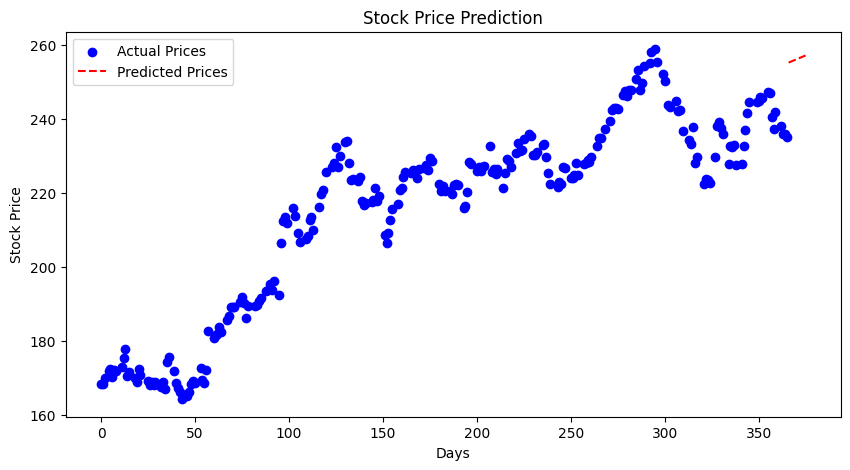

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Predict stock prices for the next 10 days
future_days = np.array([X.max() + i for i in range(1, 11)]).reshape(-1, 1)
future_prices = model.predict(future_days)

# Print predicted prices
for i, price in enumerate(future_prices, start=1):
    print(f"Day {i}: Predicted Price = ${price:.2f}")

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Prices")  # Actual Data
plt.plot(future_days, future_prices, color="red", linestyle="dashed", label="Predicted Prices")  # Prediction Line
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()
